In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
import numpy as np
import os, sys
import pickle
sys.path.append('..')
from baseline import *
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, train_test_split
from sklearn.utils import resample
from sklearn import linear_model

from tqdm import tqdm_notebook as tqdm

In [3]:
pickleDir = "/nfs/blank/h4244/nmehrle/code/ml_exoplanet_vetter/Data/2020_05_updatedLC/"

sectors = [f'sector-{i}' for i in range(1,22)]
labels, localviews, globalviews, depths, depth_err, std_depths, astronets, srad, tmag = loadSortedData(pickleDir, sectors)


X_global.shape =  (248392, 3, 201)
X_local.shape  =  (248392, 3, 61)
X_depths.shape =  (248392, 6)
y.shape        =  (248392,)


In [65]:
X, y = genDataMatrix(labels, std_depths, astronets, tmag)
Xm, ym = magnitudeCut(X, y, tmag, 10.5)

In [66]:
print('Random Forest')

depthRes=[]
for data,label in zip((X,Xm),(y,ym)):
  res = testModel(data,label,RFModel, None ,10)
  depthRes.append(res)
  print('---')

Random Forest
1 / 5 10
2 / 5 10
3 / 5 10
4 / 5 10
5 / 5 10
---
1 / 5 10
2 / 5 10
3 / 5 10
4 / 5 10
5 / 5 10
---


1038 - True Positive, 247354 - True Negative
Feature Importances
[0.43373515 0.15440927 0.11889416 0.29391309]
[0.26804095 0.17967155 0.24797096 0.3025225 ]


../baseline.py:210: RuntimeWarning: invalid value encountered in long_scalars
  return true_pos / (true_pos + false_pos)


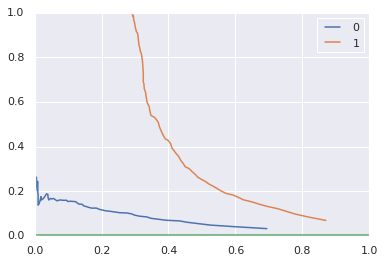

In [67]:
interpretModel(y, *depthRes)